In [1]:
# Paso 1: Importar librerías
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


In [2]:
# Paso 2: Cargar tu dataset
# Debes tener un DataFrame con columnas: anio, produccion_agricola, energia_percapita, precipitacion
df = pd.read_csv("/content/Datos1 - Final.csv")


In [5]:
# Paso 3: Definir features y target
features = ["energiapercapita", "precipitacion"]
target = "produccion_agricola"
X = df[features]
y = df[target]

In [6]:
# Paso 4: Escalar las features (pero no el target)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Paso 5: Entrenar modelo XGBoost
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=4, random_state=42)
model.fit(X_scaled, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [8]:
# Paso 5: Entrenar modelo XGBoost
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=4, random_state=42)
model.fit(X_scaled, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, ...)

In [14]:
# Paso 6: Generar los datos futuros (2025-2034)
futuro = pd.DataFrame({
    "anio": range(2025, 2035),
    "energiapercapita": np.linspace(df["energiapercapita"].iloc[-1], df["energiapercapita"].iloc[-1] + 0.5, 10),
    "precipitacion": np.linspace(df["precipitacion"].mean(), df["precipitacion"].mean(), 10) # ejemplo fijo
})

In [15]:
# Paso 7: Escalar los futuros
X_future = futuro[features]
X_future_scaled = scaler.transform(X_future)


In [16]:
# Paso 8: Predecir producción agrícola futura
futuro["produccion_predicha"] = model.predict(X_future_scaled)


In [17]:
# Paso 9: Mostrar resultados
print(futuro)

   anio  energiapercapita  precipitacion  produccion_predicha
0  2025          1.810000        32.5345          593899.0625
1  2026          1.865556        32.5345          591001.9375
2  2027          1.921111        32.5345          579381.3125
3  2028          1.976667        32.5345          579381.3125
4  2029          2.032222        32.5345          579381.3125
5  2030          2.087778        32.5345          579381.3125
6  2031          2.143333        32.5345          579381.3125
7  2032          2.198889        32.5345          579381.3125
8  2033          2.254444        32.5345          579381.3125
9  2034          2.310000        32.5345          579381.3125


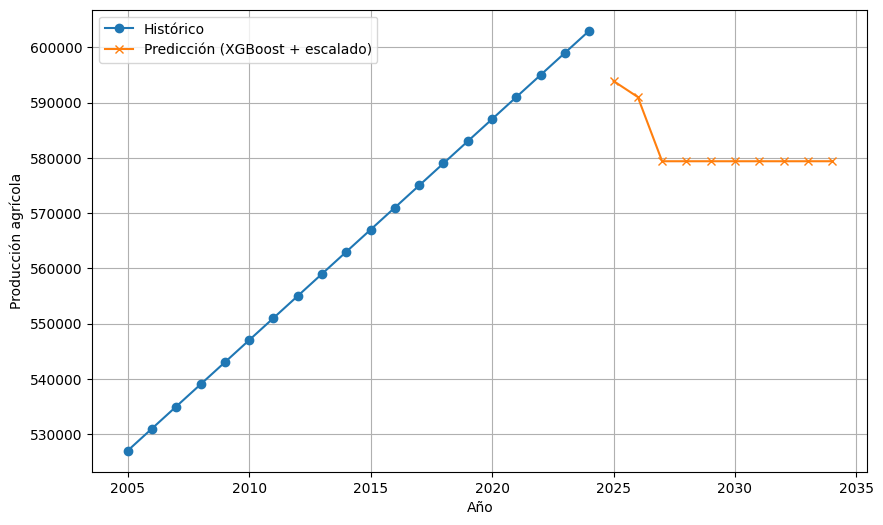

In [18]:
# Paso 10: Graficar
plt.figure(figsize=(10,6))
plt.plot(df["anio"], df["produccion_agricola"], label="Histórico", marker="o")
plt.plot(futuro["anio"], futuro["produccion_predicha"], label="Predicción (XGBoost + escalado)", marker="x")
plt.xlabel("Año")
plt.ylabel("Producción agrícola")
plt.legend()
plt.grid(True)
plt.show()

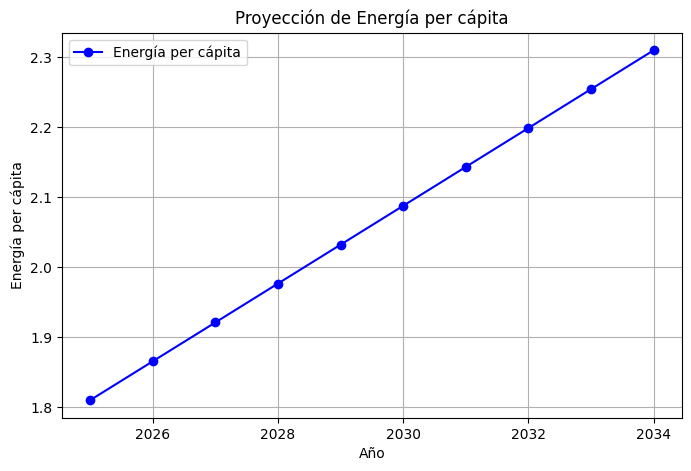

In [20]:
import matplotlib.pyplot as plt

# Supongamos que tienes ya este DataFrame con tus resultados
# df_pred contiene: ["anio", "energia_percapita", "produccion_predicha"]

# --- Gráfico 1: Energía per cápita ---
plt.figure(figsize=(8, 5))
plt.plot(df_pred["anio"], df_pred["energiapercapita"], marker="o", color="blue", label="Energía per cápita")
plt.xlabel("Año")
plt.ylabel("Energía per cápita")
plt.title("Proyección de Energía per cápita")
plt.legend()
plt.grid(True)
plt.show()

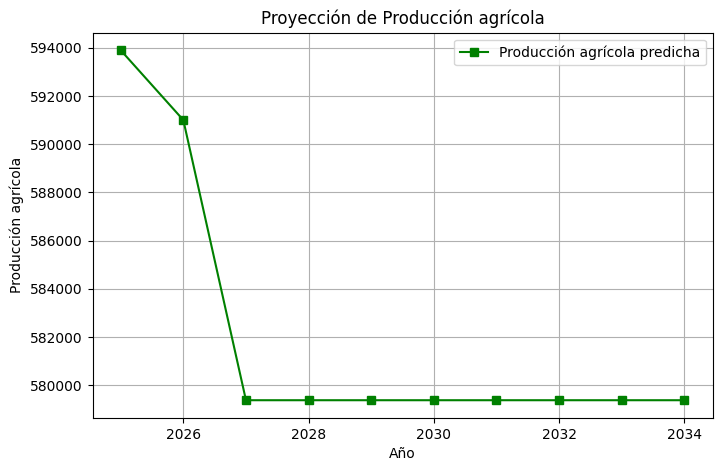

In [22]:
# --- Gráfico 2: Producción agrícola ---
plt.figure(figsize=(8, 5))
plt.plot(futuro["anio"], futuro["produccion_predicha"], marker="s", color="green", label="Producción agrícola predicha")
plt.xlabel("Año")
plt.ylabel("Producción agrícola")
plt.title("Proyección de Producción agrícola")
plt.legend()
plt.grid(True)
plt.show()